In [1]:
# IMPORTING THE REQUIRED LIBRARIES 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely import wkt
pd.set_option('display.max_columns', None)

In [4]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data = pd.read_csv('pedestrian_count_sample.csv')
ped_data = ped_data.dropna()

In [5]:
ped_data.head()

,Unnamed: 0,pedestrianCount_sum,assetUid,latitude,longitude,time
1,0.0,3.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 07:00:00 2020
2,1.0,1.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 06:00:00 2020
3,2.0,1.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 07:00:00 2020
4,3.0,0.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 06:00:00 2020
5,4.0,0.0,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,Sun May 31 07:00:00 2020


In [20]:
ped_data.shape

(52, 6)

In [7]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data_2 = pd.read_csv('pedestrian_count_sample_515.csv')
ped_data_2 = ped_data_2.dropna()

In [8]:
ped_data_2.head()

,Unnamed: 0,pedestrianCount_sum,assetUid,latitude,longitude,time
1,0.0,26.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Fri May 15 21:00:00 2020
2,1.0,39.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Fri May 15 20:00:00 2020
3,2.0,38.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Fri May 15 19:00:00 2020
4,3.0,27.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Fri May 15 18:00:00 2020
5,4.0,42.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Fri May 15 17:00:00 2020


In [19]:
ped_data_2.shape

(4368, 6)

In [11]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data_3 = pd.read_csv('pedestrian_count_sample_522.csv')
ped_data_3 = ped_data_3.dropna()

In [15]:
ped_data_3.shape

(4248, 6)

In [12]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data_4 = pd.read_csv('pedestrian_count_sample_529.csv')
ped_data_4 = ped_data_4.dropna()

In [16]:
ped_data_4.shape

(4368, 6)

In [13]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data_5 = pd.read_csv('pedestrian_count_sample_530.csv')
ped_data_5 = ped_data_5.dropna()

In [17]:
ped_data_5.shape

(624, 6)

In [14]:
# PEDESTRIAN DATA FROM CITYIQ API

ped_data_6 = pd.read_csv('pedestrian_count_sample_531.csv')
ped_data_6 = ped_data_6.dropna()

In [18]:
ped_data_6.shape

(624, 6)

In [28]:
frame = [ped_data, ped_data_2, ped_data_3, ped_data_4, ped_data_5, ped_data_6]
ped = pd.concat(frame)
ped.head(20)

,Unnamed: 0,pedestrianCount_sum,assetUid,latitude,longitude,time
1,0.0,3.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 07:00:00 2020
2,1.0,1.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,Sun May 31 06:00:00 2020
3,2.0,1.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 07:00:00 2020
4,3.0,0.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,Sun May 31 06:00:00 2020
5,4.0,0.0,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,Sun May 31 07:00:00 2020
6,5.0,0.0,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,Sun May 31 06:00:00 2020
7,6.0,2.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,Sun May 31 07:00:00 2020
8,7.0,0.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,Sun May 31 06:00:00 2020
9,8.0,11.0,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,Sun May 31 07:00:00 2020
10,9.0,12.0,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,Sun May 31 06:00:00 2020


In [22]:
ped.shape

(14284, 6)

In [29]:
ped = ped.drop(columns = ["time"], axis = 1)

In [30]:
ped_sum = ped.groupby(["assetUid", "latitude", "longitude"])["pedestrianCount_sum"].sum().reset_index()
ped_sum.head(20)

,assetUid,latitude,longitude,pedestrianCount_sum
0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0
1,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,8723.0
2,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,4521.0
3,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0
4,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,5719.0
5,38c192b9-0d6c-41c8-8d26-c5964841fc98,45.504743,-122.636529,5731.0
6,3f399bfa-a8cc-4d90-9c5c-f72533efdebd,45.511978,-122.627759,5824.0
7,5850139e-58eb-436b-96f7-ecfd4665cc09,45.504801,-122.654883,3149.0
8,5db39821-dfb7-441b-8725-d8ab0f0f5b1a,45.504214,-122.537479,5883.0
9,678c1456-547c-448d-a86e-78107b53e7c0,45.511984,-122.629695,7211.0


In [58]:
ped_sum.shape

(26, 5)

In [45]:
# PORTLAND DATA

portland_data = pd.read_csv('Final_merged_city_portland.csv')

In [46]:
portland_data.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,162.0,1859.0,97009,0.0,0.0,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,149.0,1960.0,97009,0.0,0.0,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,139.0,1998.0,97009,0.0,0.0,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,129.0,2087.0,97009,0.0,0.0,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,120.0,2191.0,97009,0.0,0.0,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392


In [61]:
portland_data.shape

(326, 23)

In [47]:
portland_data = portland_data[portland_data["year"] == 2017]

In [55]:
portland_data.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
7,2453,41051010402,POINT (-122.3356596646475 45.48564052912985),2017,"MULTIPOLYGON (((-122.38688 45.51903, -122.3726...",3456.0,6981.0,4633.0,399.0,485.0,115.0,2303.0,97009,0.000000,0.000000,0.355966,0.133792,0.867188,0.032118,0.037037,0.882523,0.000000,0.035880
15,2557,41051010500,POINT (-122.0852430195605 45.52765726906909),2017,"MULTIPOLYGON (((-122.39710 45.57260, -122.3918...",1535.0,3912.0,2732.0,245.0,306.0,122.0,1466.0,97014,63.888889,6.388889,0.224949,0.214468,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938
23,2558,41051010500,POINT (-122.0852430195605 45.52765726906909),2017,"MULTIPOLYGON (((-122.39710 45.57260, -122.3918...",1535.0,3912.0,2732.0,245.0,306.0,122.0,1466.0,97019,292.622951,29.262295,0.224949,0.214468,0.000000,0.000000,0.037785,0.833876,0.005863,0.016938
31,2109,41051009603,POINT (-122.4607256890022 45.52919102699193),2017,"MULTIPOLYGON (((-122.46613 45.53953, -122.4615...",1766.0,4044.0,2533.0,119.0,177.0,119.0,1229.0,97024,2.129630,0.190741,0.370425,0.116716,0.792683,0.036806,0.046433,0.852208,0.024915,0.018120
39,2356,41051010100,POINT (-122.444171605879 45.52613866368701),2017,"MULTIPOLYGON (((-122.45665 45.53949, -122.4533...",3898.0,8755.0,6112.0,363.0,551.0,190.0,3728.0,97024,920.000000,82.400000,0.382524,0.145060,1.000000,0.081324,0.081324,0.879169,0.000000,0.009492


In [48]:
# CONVERTING THE COLUMNS TO BE COMPATIBLE WITH PLOTTING

portland_data['geometry'] = portland_data['geometry'].apply(wkt.loads)
portland_data['centroid'] = portland_data['centroid'].apply(wkt.loads)
portland_data = gpd.GeoDataFrame(portland_data, geometry='geometry')

/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zehui/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [49]:
portland_data_gdf = gpd.GeoDataFrame(portland_data, geometry='geometry', crs={'init': 'epsg:4326'})

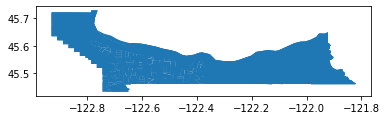

In [50]:
portland_data_gdf.plot()

In [51]:
ped_data_gdf = gpd.GeoDataFrame(ped_sum, geometry=gpd.points_from_xy(ped_sum.longitude, ped_sum.latitude))

In [52]:
ped_data_gdf = gpd.GeoDataFrame(ped_data_gdf, geometry='geometry', crs={'init': 'epsg:4326'})

In [53]:
ped_data_gdf.head()

,assetUid,latitude,longitude,pedestrianCount_sum,geometry
0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,POINT (-122.62250 45.50472)
1,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,8723.0,POINT (-122.62269 45.51194)
2,200c0e3b-c1cb-4756-a948-0b12861a3cb1,45.504794,-122.653836,4521.0,POINT (-122.65384 45.50479)
3,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,POINT (-122.60501 45.50528)
4,30508533-1d08-4b86-b7f8-fb18e01acee6,45.511974,-122.634877,5719.0,POINT (-122.63488 45.51197)


In [60]:
ped_data_gdf.shape

(26, 5)

In [54]:
# SPATIAL JOIN WITH PEDESTRIAN AND PORTLAND

sjoined_listings = gpd.sjoin(ped_data_gdf, portland_data_gdf, op='within',how='right')
sjoined_listings

,index_left,assetUid,latitude,longitude,pedestrianCount_sum,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,3.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,13.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,5150.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,14.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,15395.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,NaN,NaN,NaN,NaN,NaN,1871,41051008400,POINT (-122.5428252449001 45.49691909524015),2017,"MULTIPOLYGON (((-122.54801 45.50419, -122.5376...",1958.0,4398.0,2882.0,141.0,184.0,154.0,1624.0,97266,336.377649,24.524085,0.431787,0.116189,0.869565,0.081716,0.093973,0.796221,0.010215,0.041879
2575,NaN,NaN,NaN,NaN,NaN,1887,41051008500,POINT (-122.547126858435 45.48282091614918),2017,"MULTIPOLYGON (((-122.55740 45.47834, -122.5570...",2214.0,4518.0,3076.0,96.0,223.0,124.0,1477.0,97266,758.805395,55.321773,0.414564,0.137450,0.954733,0.104788,0.109756,0.837398,0.000000,0.015357
2583,NaN,NaN,NaN,NaN,NaN,1903,41051008600,POINT (-122.5841997909028 45.46868321437336),2017,"MULTIPOLYGON (((-122.58935 45.46865, -122.5893...",2217.0,4008.0,2901.0,152.0,278.0,125.0,1612.0,97266,289.441233,21.102119,0.449850,0.093313,1.000000,0.114118,0.114118,0.746504,0.009923,0.009021


In [56]:
portland_final = sjoined_listings.dropna()
portland_final.head(20)

,index_left,assetUid,latitude,longitude,pedestrianCount_sum,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,households,income,zipcode,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,
503,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,3.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,13.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,5150.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
503,14.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,15395.0,166,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97202,184.509425,13.617690,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,0.0,0af0d63b-0817-4af1-9a44-1c23e6a03de2,45.504724,-122.622503,7500.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,3.0,29497269-f9c7-43b8-a482-c4bce4ef211a,45.505282,-122.605010,5664.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,13.0,901b0544-f704-4683-986d-97d4c949c106,45.505256,-122.609138,5150.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
743,14.0,92747343-e7b7-4e6e-aa8d-4eb9b111e193,45.505300,-122.601757,15395.0,167,41051000801,POINT (-122.6108897479948 45.50135311494248),2017,"MULTIPOLYGON (((-122.62265 45.50480, -122.6195...",2964.0,4829.0,3790.0,608.0,550.0,155.0,2064.0,97206,1083.796740,84.908917,0.598675,0.077656,1.000000,0.131579,0.131579,0.648785,0.113698,0.034413
1343,1.0,1d663439-3e17-4972-8111-d8641ffa2da7,45.511943,-122.622689,8723.0,319,41051001400,POINT (-122.6176377672391 45.51142207538373),2017,"MULTIPOLYGON (((-122.62301 45.51929, -122.6178...",3528.0,5549.0,4419.0,872.0,803.0,141.0,2469.0,97215,1597.929607,133.043478,0.615066,0.069021,1.000000,0.161565,0.161565,0.569161,0.150510,0.032880


In [57]:
portland_final.shape

(45, 28)

In [59]:
portland_final.to_csv("portland_final.csv")